<a href="https://colab.research.google.com/github/2303A52097/Generative_AI_2025/blob/main/2303A52105_Week07_Assignment_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment_7.1

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.5585 - loss: 0.6813 - val_accuracy: 0.5909 - val_loss: 0.6720
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5804 - loss: 0.6791 - val_accuracy: 0.5909 - val_loss: 0.6719
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5483 - loss: 0.6812 - val_accuracy: 0.5909 - val_loss: 0.6719
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5443 - loss: 0.6835 - val_accuracy: 0.5909 - val_loss: 0.6718
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5481 - loss: 0.6832 - val_accuracy: 0.5909 - val_loss: 0.6718
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5455 - loss: 0.6823 - val_accuracy: 0.5909 - val_loss: 0.6718
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5374 - loss: 0.6842 - val_accuracy: 0.5909 - val_loss: 0.6717
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5494 - loss: 0.6816 - val_accuracy: 

Training Accuracy: 0.5765472054481506, Testing Accuracy: 0.5909090638160706
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        99
           1       0.37      0.20      0.26        55

    accuracy                           0.59       154
   macro avg       0.51      0.50      0.49       154
weighted avg       0.55      0.59      0.55       154



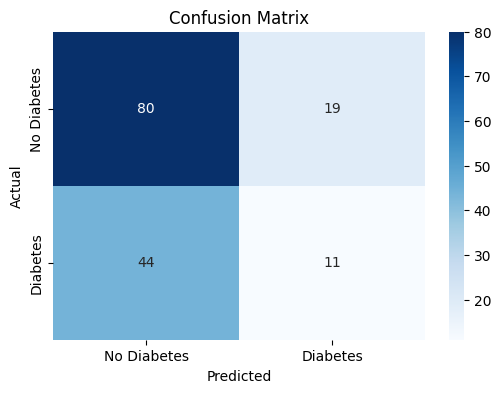

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
df = pd.read_csv(url, header=None)
df.columns = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
              'bmi', 'diabetespedigree', 'age', 'outcome']

target_column = 'outcome'
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test))

train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training Accuracy: {train_acc}, Testing Accuracy: {test_acc}')

model.save('diabetes_model.h5')

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_diabetes(features):
    loaded_model = keras.models.load_model('diabetes_model.h5')
    features = scaler.transform([features])
    return (loaded_model.predict(features)[0][0] > 0.5).astype(int)